#### Import libaries

In [94]:
import pandas as pd
import numpy as np

#### Load the dataset

In [95]:
df = pd.read_csv('stroke_data.csv')

In [96]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


#### Data cleaning

In [97]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [98]:
df.drop(labels='ever_married', axis=1, inplace=True)

In [99]:
df.rename(columns={'heart_disease': 'disease',
                   'work_type': 'work',
                  'Residence_type':'residency',
                  'avg_glucose_level':'glucose',
                  'smoking_status':'smoking'},
          inplace=True, errors='raise')

In [100]:
df.isnull().sum()

sex             3
age             0
hypertension    0
disease         0
work            0
residency       0
glucose         0
bmi             0
smoking         0
stroke          0
dtype: int64

In [101]:
df.drop(labels='residency', axis=1, inplace=True)

In [102]:
df.head()

,sex,age,hypertension,disease,work,glucose,bmi,smoking,stroke
0,1.0,63.0,0,1,4,228.69,36.6,1,1
1,1.0,42.0,0,1,4,105.92,32.5,0,1
2,0.0,61.0,0,0,4,171.23,34.4,1,1
3,1.0,41.0,1,0,3,174.12,24.0,0,1
4,1.0,85.0,0,0,4,186.21,29.0,1,1


In [103]:
df.dropna(inplace=True)

In [104]:
df.isnull().sum()

sex             0
age             0
hypertension    0
disease         0
work            0
glucose         0
bmi             0
smoking         0
stroke          0
dtype: int64

#### Visualization

In [105]:
import seaborn as sns

In [106]:
df['stroke'].value_counts()

stroke
1    20460
0    20447
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

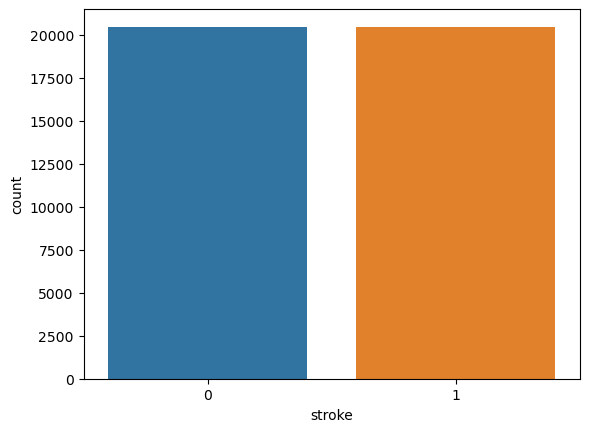

In [107]:
sns.countplot(data=df, x='stroke')

<Axes: xlabel='sex', ylabel='count'>

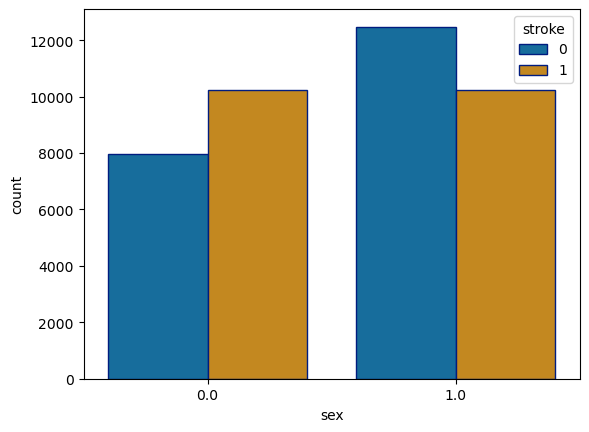

In [108]:
sns.countplot(data=df, x='sex', hue= 'stroke', palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

In [109]:
df.describe()

,sex,age,hypertension,disease,work,glucose,bmi,smoking,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,3.461095,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.780934,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,3.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,4.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,4.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,4.000000,271.740000,92.000000,1.000000,1.000000


#### Data split

In [110]:
X = df.drop('stroke',axis=1)
Y = df[['stroke']]

In [111]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=.20,random_state=41)

#### Model Building

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [113]:
dtclf = DecisionTreeClassifier()

In [114]:
dtclf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [115]:
dtclf.score(xtest,ytest)

0.9965778538254706

In [116]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [117]:
cm=confusion_matrix(ytest, dtclf.predict(xtest))
cm

array([[4112,   21],
       [   7, 4042]], dtype=int64)

<Axes: >

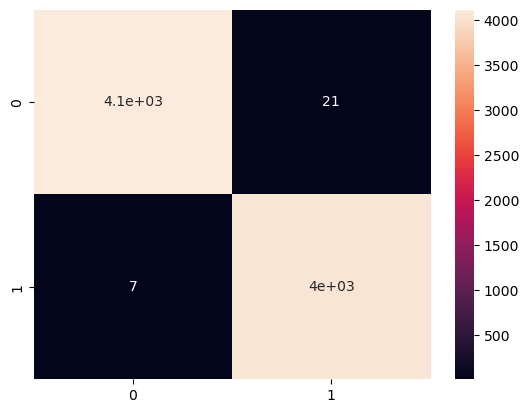

In [118]:
sns.heatmap(cm,annot=True)

In [119]:
print(classification_report(ytest, dtclf.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4133
           1       0.99      1.00      1.00      4049

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



In [120]:
lrclf = LogisticRegression(max_iter=1000)

In [121]:
lrclf.fit(xtrain,ytrain)

C:\Users\Anik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [122]:
lrclf.score(xtest,ytest)

0.6761183084820337

In [123]:
cm=confusion_matrix(ytest, lrclf.predict(xtest))
cm

array([[3179,  954],
       [1696, 2353]], dtype=int64)

<Axes: >

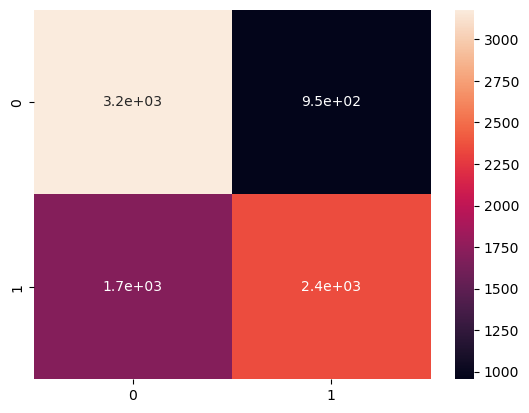

In [124]:
sns.heatmap(cm,annot=True)

In [125]:
print(classification_report(ytest, lrclf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      4133
           1       0.71      0.58      0.64      4049

    accuracy                           0.68      8182
   macro avg       0.68      0.68      0.67      8182
weighted avg       0.68      0.68      0.67      8182



In [126]:
recall_score(ytest, lrclf.predict(xtest))

0.5811311434922203

In [127]:
f1_score(ytest, lrclf.predict(xtest))

0.6397498640565524

### Save ML Model

In [128]:
import joblib as jb

In [129]:
jb.dump(dtclf,'model')

['model']

In [131]:
Model = jb.load('model')

In [132]:
Model.score(xtest,ytest)

0.9965778538254706